Example notebook showing how to use the MCMC sampler (currently in development)

In [1]:
import os
import sys
import argparse
import torch
from getdist import plots, MCSamples
import getdist
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal

In [2]:
path = os.path.realpath(os.path.join(os.getcwd(), '../..'))
sys.path.insert(0, path)

In [3]:
from nnest import MCMCSampler
from nnest.likelihoods import *

In [4]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [5]:
# Likelihood
like = Himmelblau()
#like = Rosenbrock(2)
#like = Gaussian(2, 0.9)
#like = Eggbox()
#like = GaussianShell(2)
#like = GaussianMix(2)

In [6]:
sampler = MCMCSampler(like.x_dim, like.loglike, hidden_dim=16, num_blocks=3, flow='spline')

Creating directory for new run logs/test/run60
[nnest.trainer] [INFO] SingleSpeedSpline(
  (flow): NormalizingFlow(
    (flows): ModuleList(
      (0): ActNorm()
      (1): Invertible1x1Conv()
      (2): NSF_CL(
        (f1): MLP(
          (net): Sequential(
            (0): Linear(in_features=1, out_features=16, bias=True)
            (1): LeakyReLU(negative_slope=0.2)
            (2): Linear(in_features=16, out_features=16, bias=True)
            (3): LeakyReLU(negative_slope=0.2)
            (4): Linear(in_features=16, out_features=16, bias=True)
            (5): LeakyReLU(negative_slope=0.2)
            (6): Linear(in_features=16, out_features=23, bias=True)
          )
        )
        (f2): MLP(
          (net): Sequential(
            (0): Linear(in_features=1, out_features=16, bias=True)
            (1): LeakyReLU(negative_slope=0.2)
            (2): Linear(in_features=16, out_features=16, bias=True)
            (3): LeakyReLU(negative_slope=0.2)
            (4): Linear(in_fe

In [7]:
init_samples = sampler._init_samples(init_scale=8.0, mcmc_steps=100)

[nnest.sampler] [INFO] Getting initial samples with emcee
[nnest.sampler] [INFO] Mean acceptance fraction: [0.069]


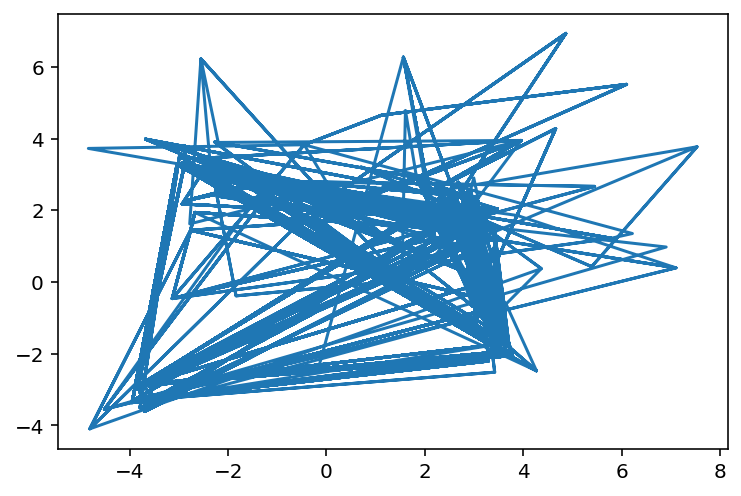

In [8]:
plt.plot(init_samples[:,0], init_samples[:,1])
plt.show()

In [9]:
sampler.run(bootstrap_iters=2, jitter=0.01, init_samples=init_samples)

[nnest.sampler] [INFO] Alpha [0.7071]
[nnest.sampler] [INFO] Bootstrap step [1]
[nnest.trainer] [INFO] Number of training samples [2000]
[nnest.trainer] [INFO] Training jitter [0.0100]
[nnest.trainer] [INFO] Epoch [1] train loss [0.0296] validation loss [0.0144]
[nnest.trainer] [INFO] Epoch [50] train loss [0.0051] validation loss [0.0017]
[nnest.trainer] [INFO] Epoch [100] train loss [0.0009] validation loss [-0.0002]
[nnest.trainer] [INFO] Epoch [150] train loss [-0.0006] validation loss [-0.0008]
[nnest.trainer] [INFO] Epoch [200] train loss [-0.0013] validation loss [-0.0012]
[nnest.trainer] [INFO] Best epoch [198] validation loss [-0.0013]
[nnest.sampler] [INFO] Bootstrap step [2]
[nnest.sampler] [INFO] Acceptance [0.4000] min ESS [1.0560] max ESS [1.2497] average jump distance [0.3003]
[nnest.sampler] [INFO] Acceptance [0.1871] min ESS [4.5706] max ESS [7.3650] average jump distance [0.0989]
[nnest.sampler] [INFO] Acceptance [0.1855] min ESS [7.3614] max ESS [12.4105] average jum

In [10]:
samples = [sampler.samples[i, :, :].squeeze() for i in range(sampler.samples.shape[0])]
latent_samples = [sampler.latent_samples[i, :, :].squeeze() for i in range(sampler.latent_samples.shape[0])]
loglikes = [sampler.loglikes[i, :].squeeze() for i in range(sampler.loglikes.shape[0])]

In [11]:
mc = MCSamples(samples=samples, loglikes=loglikes)

Removed no burn in


In [12]:
print(mc.getEffectiveSamples())
print(mc.getMargeStats())
print(mc.getConvergeTests())

2420.8063390274215
Marginalized limits: 0.68; 0.95; 0.99

parameter   mean           sddev          lower1         upper1         limit1 lower2         upper2         limit2 lower3         upper3         limit3 
param1      4.9487646E-01  3.2408163E+00 -3.8727887E+00  3.7046209E+00  two   -3.9871456E+00  3.7945343E+00  two   -3.9877423E+00  3.7968221E+00  two     p_{1}
param2      2.8680922E-01  2.5338554E+00 -3.3844212E+00  3.2791061E+00  two   -3.5030610E+00  3.3705948E+00  two   -3.5025026E+00  3.3544490E+00  two     p_{2}

Parameter autocorrelation lengths (effective number of samples N_eff = tot weight/weight length)

            Weight Length   Sample length           N_eff
param1           1.03E+01           10.25            2438
param2           2.17E+01           21.75            1149


mean convergence stats using remaining chains
param sqrt(var(chain mean)/mean(chain var))

param1        0.0558  p_{1}
param2        0.0700  p_{2}

var(mean)/mean(var) for eigenvalues of covari

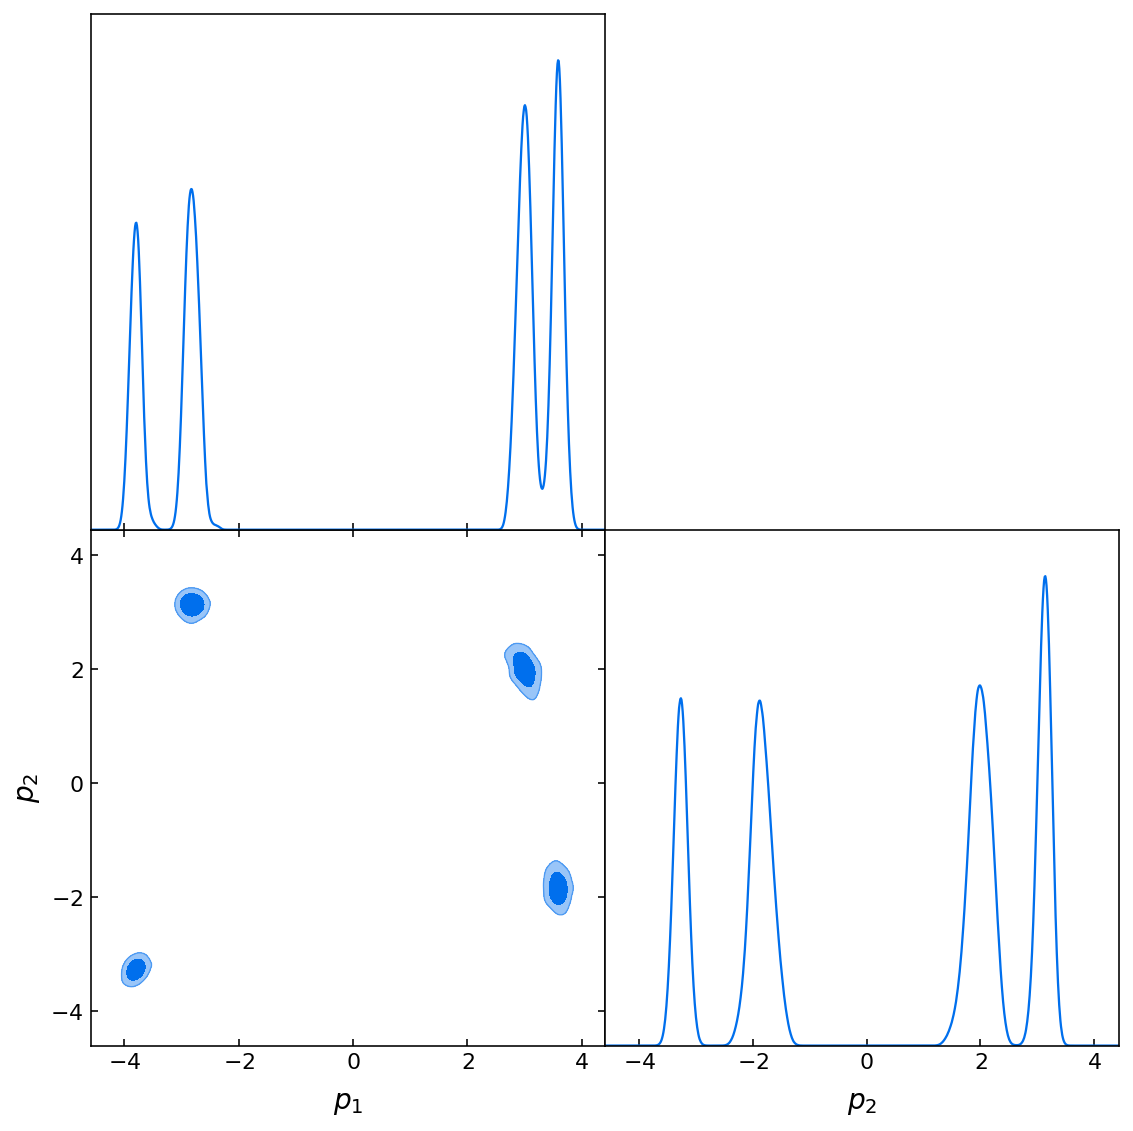

In [13]:
g = plots.getSubplotPlotter(width_inch=8)
g.triangle_plot(mc, filled=True)

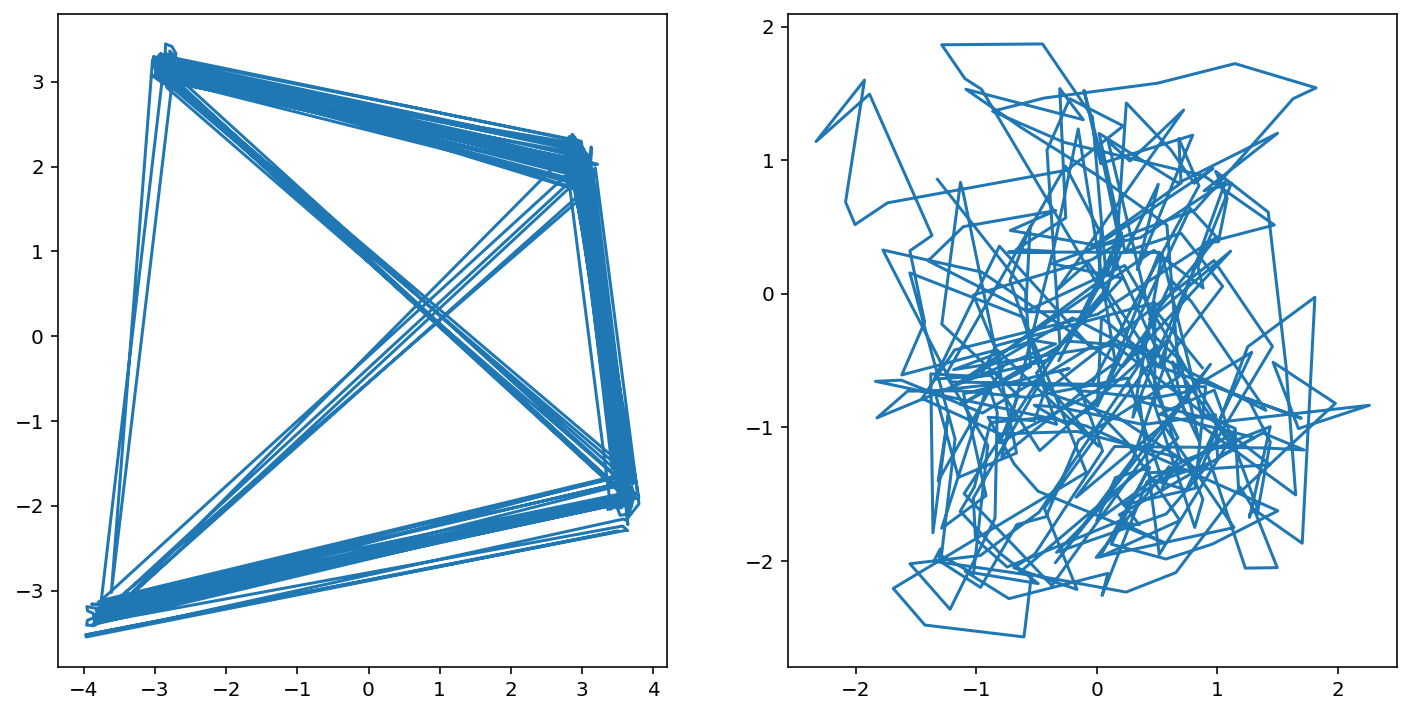

In [14]:
fig, ax = plt.subplots(1, 2, figsize=(12,6))
ax[0].plot(samples[0][0:1000,0], samples[0][0:1000,1])
ax[1].plot(latent_samples[0][0:1000,0], latent_samples[0][0:1000,1])
plt.show()